In [1]:
import pandas as pd
pd.set_option("display.max_columns", 1000)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
sns.set_style('ticks')

Matplotlib created a temporary cache directory at /scratch/naotok/3243018/matplotlib-8lhbuayu because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
df = pd.read_csv(

    "/rhome/naotok/bigdata/Upf2_paper/Table_S5.csv"
    
)

In [3]:
df.head()

,gid,glen,name,type,upf2_ko_wt_p,upf2_ko_wt_fdr,upf2_ko_wt_pt,upf2_ko_wt_qt,upf2_ko_aveTPMx,upf2_wt_aveTPMy,upf2_ko_wt_TPMfd,upf2_ko_wt_DEb,upf2p53_ko_upf2_ko_p,upf2p53_ko_upf2_ko_fdr,upf2p53_ko_upf2_ko_pt,upf2p53_ko_upf2_ko_qt,upf2p53_ko_aveTPMx,upf2_ko_aveTPMy,upf2p53_ko_upf2_ko_TPMfd,upf2p53_ko_upf2_ko_DEb,tpm_Upf2ff_KO3,tpm_Upf2ff_KO4,tpm_Upf2ff_KO5,tpm_Upf2ff_KO6,tpm_Upf2ff_KO8,tpm_Upf2ff_KO9,tpm_Upf2ff_WT3,tpm_Upf2ff_WT4,tpm_Upf2ff_WT5,tpm_Upf2ff_WT6,tpm_Upf2ff_WT8,tpm_Upf2ff_WT9,tpm_Upf2ffP53ff_KO3,tpm_Upf2ffP53ff_KO4,tpm_Upf2ffP53ff_KO5,tpm_Upf2ffP53ff_KO6,tpm_Upf2ffP53ff_KO8,tpm_Upf2ffP53ff_KO9,tpm_Upf2ffP53ff_WT3,tpm_Upf2ffP53ff_WT4,tpm_Upf2ffP53ff_WT5,tpm_Upf2ffP53ff_WT6,tpm_Upf2ffP53ff_WT8,tpm_Upf2ffP53ff_WT9
0,ENSMUSG00000079800.2,1271,AC125149.3,protein_coding,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ENSMUSG00000095092.1,366,AC125149.5,protein_coding,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ENSMUSG00000079192.2,255,AC125149.1,protein_coding,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ENSMUSG00000079794.2,255,AC125149.2,protein_coding,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ENSMUSG00000094799.1,366,AC125149.4,protein_coding,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df["upf2_fc_log"] = np.log2(df["upf2_ko_wt_TPMfd"])
df["upf2p53_fc_log"] = np.log2(df["upf2p53_ko_upf2_ko_TPMfd"])

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
# rescued genes
df.loc[
    (df["upf2_ko_wt_DEb"] == 1) &
    (df["upf2p53_ko_upf2_ko_DEb"] == -1),
    'color'
] = "salmon"

# rescued genes
df.loc[
    (df["upf2_ko_wt_DEb"] == -1) &
    (df["upf2p53_ko_upf2_ko_DEb"] == 1),
    'color'
] = "steelblue"

df = df.fillna({"color": "grey"})
df = df.replace([np.inf, -np.inf], np.nan)

In [6]:
plot_df = df[["name", "upf2_fc_log", "upf2p53_fc_log", "color"]].dropna()

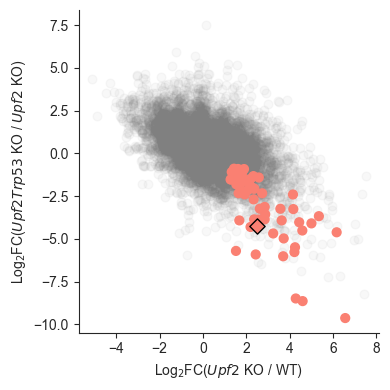

In [7]:
# scatter plot
fig = plt.figure(figsize = (4, 4))
ax = fig.add_subplot(111)

# Non-rescued genes
ax = plt.scatter(

    data = plot_df[plot_df['color'] == "grey"],
    x = "upf2_fc_log",
    y = "upf2p53_fc_log",
    color = "grey",
    alpha = 0.05,
    s = 40

)

# Rescued genes
ax = plt.scatter(

    data = plot_df[plot_df['color'] != "grey"],
    x = "upf2_fc_log",
    y = "upf2p53_fc_log",
    color = plot_df[plot_df['color'] != "grey"]['color'],
    alpha = 1,
    s = 40

)

# Cdkn1a
ax = plt.scatter(

    data = plot_df[plot_df['name'] == "Cdkn1a"],
    x = "upf2_fc_log",
    y = "upf2p53_fc_log",
    color = plot_df[plot_df['name'] == "Cdkn1a"]['color'],
    edgecolor = "black",
    marker = "D",
    s = 60

)

plt.xlabel("Log$_{2}$FC($\it{Upf2}$ KO / WT)")
plt.ylabel("Log$_{2}$FC($\it{Upf2 Trp53}$ KO / $\it{Upf2}$ KO)")

sns.despine()
plt.tight_layout()

plt.savefig("/rhome/naotok/Upf2_paper/figure/bulk_DEG_scatter.png", dpi = 1000)